In [1]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../corona_2019.csv')

In [3]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [4]:
df = df.groupby(['ObservationDate','Country/Region']).agg({'Deaths':'sum'}).reset_index()

In [5]:
df.head()

,ObservationDate,Country/Region,Deaths
0,01/22/2020,Hong Kong,0.0
1,01/22/2020,Japan,0.0
2,01/22/2020,Macau,0.0
3,01/22/2020,Mainland China,17.0
4,01/22/2020,South Korea,0.0


In [6]:
china = df[(df['Country/Region']=='Mainland China') & (df['Deaths']>5)]['Deaths'].reset_index(drop=True).to_frame()

In [7]:
italy = df[(df['Country/Region']=='Italy') & (df['Deaths']>5)]['Deaths'].reset_index(drop=True).to_frame()

In [8]:
south_korea = df[(df['Country/Region']=='South Korea') & (df['Deaths']>5)]['Deaths'].reset_index(drop=True).to_frame()

In [9]:
china.shape

(40, 1)

In [10]:
italy.shape

(7, 1)

In [11]:
south_korea.shape

(8, 1)

In [12]:
china_norm = china['Deaths'].iloc[0]
korea_norm = south_korea['Deaths'].iloc[0]
italy_norm = italy['Deaths'].iloc[0]
china['Deaths'] = china['Deaths']/china_norm
south_korea['Deaths'] = south_korea['Deaths']/korea_norm
italy['Deaths'] = italy['Deaths']/italy_norm

In [13]:
double_two_days = [(2**(i/2)) for i in range(40)]

In [14]:
double_five_days = [(2**(i/5)) for i in range(40)]

In [15]:
double_ten_days = [(2**(i/10)) for i in range(40)]

In [16]:
double_index = np.arange(0,40)

In [17]:
china_trace = go.Scatter(
    x = china.index,
    y = china.Deaths,
    mode='lines+markers',
    name='China: Normalised (x{})'.format(str(int(china_norm)))
)

In [18]:
south_korea_trace = go.Scatter(
    x = south_korea.index,
    y = south_korea.Deaths,
    mode='lines+markers',
    name='South Korea: Normalised (x{})'.format(str(int(korea_norm)))
)

In [19]:
italy_trace = go.Scatter(
    x = italy.index,
    y = italy.Deaths,
    mode='lines+markers',
    name='Italy: Normalised (x{})'.format(str(int(italy_norm)))
)

In [20]:
double_two_trace = go.Scatter(
    x = double_index,
    y = double_two_days,
    mode='lines',
    line=dict(color='#A6A6A6', width=1),
    name='Double Every 2 days',
    showlegend=False
)

In [21]:
double_five_trace = go.Scatter(
    x = double_index,
    y = double_five_days,
    mode='lines',
    line=dict(color='#A6A6A6', width=1),
    name='Double Every 5 days',
    showlegend=False
)

In [22]:
double_ten_trace = go.Scatter(
    x = double_index,
    y = double_ten_days,
    mode='lines',
    line=dict(color='#A6A6A6', width=1),
    name='Double Every 10 days',
    showlegend=False
)

In [23]:
traces = [china_trace, south_korea_trace, italy_trace, double_two_trace, double_five_trace, double_ten_trace ]

In [40]:
layout = go.Layout(
    height=600,
    width= 1200,
    xaxis=dict(
        title='Days',
        range=[0,40],
        showline=True,
        showgrid=True,
        showticklabels=True,
        linewidth=2,
        linecolor='black',
        gridcolor='gray'
    ),
    yaxis=dict(
        title='Death',
        type="log",
        range=[0,5],
        showgrid=True,
        zeroline=True,
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='gray'
    ),
    plot_bgcolor='white',
    annotations=[
        dict(
            x=35,
            y=5,
            text='Double Every 2 Days',
            showarrow=False,
        ),
        dict(
            x=39,
            y=2.4,
            text='Double Every 5 Days',
            showarrow=False,
        ),
        dict(
            x=39,
            y=1,
            text='Double Every 10 Days',
            showarrow=False,
        )
    ]
    
)

In [41]:
fig = go.Figure(data=traces, layout =layout)

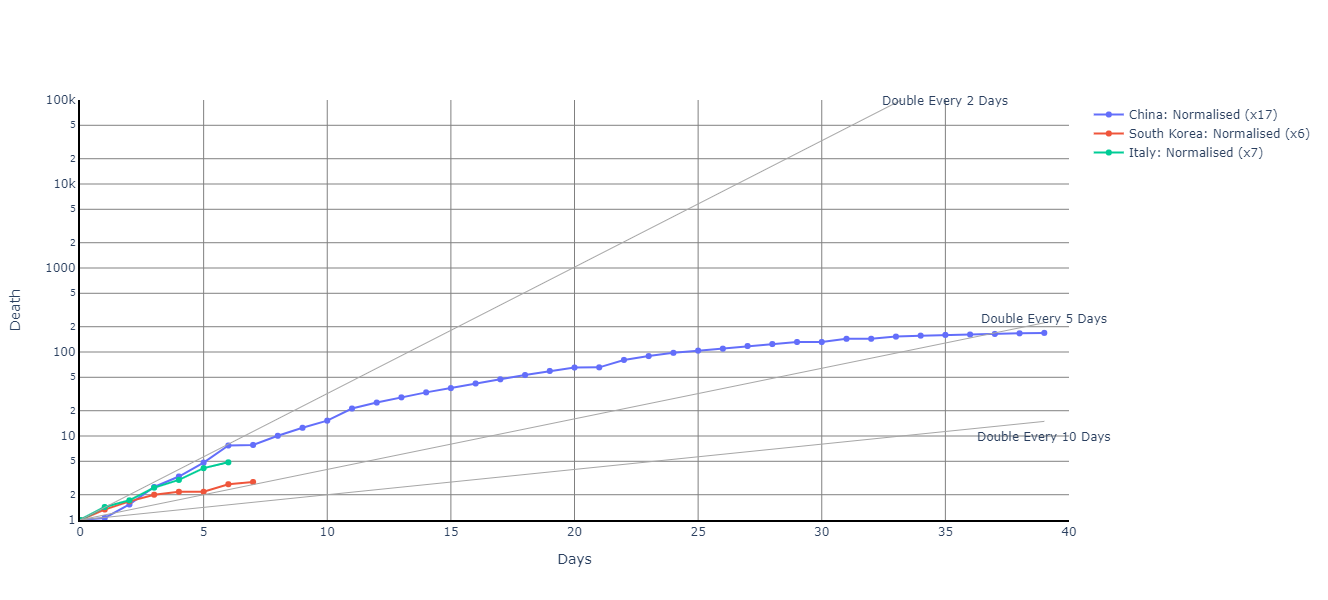

In [42]:
iplot(fig)